In [1]:
#install.packages('bayesreg', lib='./rlib/')

In [2]:
library('bayesreg',lib='./rlib/')
data(spambase)
colnames(spambase)[50:55] <- paste0('char.freq.',c('semic','paren','bracket','exclaim','dollar','pound'))

In [3]:
spambase[1:5,1:5]

,is.spam,word.freq.make,word.freq.address,word.freq.all,word.freq.3d
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00,0.64,0.64,0
2,1,0.21,0.28,0.50,0
3,1,0.06,0.00,0.71,0
4,1,0.00,0.00,0.00,0
5,1,0.00,0.00,0.00,0


In [4]:
#install.packages('gbm',lib='./rlib/')

In [5]:
library('gbm',lib='./rlib/')

Loaded gbm 2.1.8.1



In [6]:
?gbm

gbm                    package:gbm                     R Documentation

_G_e_n_e_r_a_l_i_z_e_d _B_o_o_s_t_e_d _R_e_g_r_e_s_s_i_o_n _M_o_d_e_l_i_n_g (_G_B_M)

_D_e_s_c_r_i_p_t_i_o_n:

     Fits generalized boosted regression models. For technical details,
     see the vignette: ‘utils::browseVignettes("gbm")’.

_U_s_a_g_e:

     gbm(
       formula = formula(data),
       distribution = "bernoulli",
       data = list(),
       weights,
       var.monotone = NULL,
       n.trees = 100,
       interaction.depth = 1,
       n.minobsinnode = 10,
       shrinkage = 0.1,
       bag.fraction = 0.5,
       train.fraction = 1,
       cv.folds = 0,
       keep.data = TRUE,
       verbose = FALSE,
       class.stratify.cv = NULL,
       n.cores = NULL
     )
     
_A_r_g_u_m_e_n_t_s:

 formula: A symbolic description of the model to be fit. The formula
          may include an offset term (e.g. y~offset(n)+x). If
          ‘keep.data = FALSE’ in the initial call to ‘gbm’ then it is
          the user's responsibility to resupply the offset to
          ‘gbm.more’.

distribution: Either a character string specifying the name of the
          distribution to use or a list with a component ‘name’
          specifying the distribution and any additional parameters
          needed. If not specified, ‘gbm’ will try to guess: if the
          response has only 2 unique values, bernoulli is assumed;
          otherwise, if the response is a factor, multinomial is
          assumed; otherwise, if the response has class ‘"Surv"’, coxph
          is assumed; otherwise, gaussian is assumed.

          Currently available options are ‘"gaussian"’ (squared error),
          ‘"laplace"’ (absolute loss), ‘"tdist"’ (t-distribution loss),
          ‘"bernoulli"’ (logistic regression for 0-1 outcomes),
          ‘"huberized"’ (huberized hinge loss for 0-1 outcomes),
          classes), ‘"adaboost"’ (the AdaBoost exponential loss for 0-1
          outcomes), ‘"poisson"’ (count outcomes), ‘"coxph"’ (right
          censored observations), ‘"quantile"’, or ‘"pairwise"’
          (ranking measure using the LambdaMart algorithm).

          If quantile regression is specified, ‘distribution’ must be a
          list of the form ‘list(name = "quantile", alpha = 0.25)’
          where ‘alpha’ is the quantile to estimate. The current
          version's quantile regression method does not handle
          non-constant weights and will stop.

          If ‘"tdist"’ is specified, the default degrees of freedom is
          4 and this can be controlled by specifying ‘distribution =
          list(name = "tdist", df = DF)’ where ‘DF’ is your chosen
          degrees of freedom.

          If "pairwise" regression is specified, ‘distribution’ must be
          a list of the form
          ‘list(name="pairwise",group=...,metric=...,max.rank=...)’
          (‘metric’ and ‘max.rank’ are optional, see below). ‘group’ is
          a character vector with the column names of ‘data’ that
          jointly indicate the group an instance belongs to (typically
          a query in Information Retrieval applications). For training,
          only pairs of instances from the same group and with
          different target labels can be considered. ‘metric’ is the IR
          measure to use, one of

          list("conc") Fraction of concordant pairs; for binary labels,
              this is equivalent to the Area under the ROC Curve

          : Fraction of concordant pairs; for binary labels, this is
              equivalent to the Area under the ROC Curve

          list("mrr") Mean reciprocal rank of the highest-ranked
              positive instance

          : Mean reciprocal rank of the highest-ranked positive
              instance

          list("map") Mean average precision, a generalization of ‘mrr’
              to multiple positive instances

          : Mean average precision, a generalization of ‘mrr’

In [7]:
dim(spambase)

[1] 4601   58

In [8]:
train_ss = sample(1:nrow(spambase),floor(nrow(spambase)/2))

In [9]:
head(train_ss)

[1] 1778 2012 1006 2398 3274 1573

In [10]:
train = spambase[train_ss,]
validate = spambase[-train_ss,]

In [11]:
dim(train)
dim(validate)

[1] 2300   58

[1] 2301   58

In [12]:
mod = gbm(is.spam~.,data=train,distribution="adaboost",n.trees=100,
          shrinkage=0.1,interaction.depth=1,verbose=TRUE)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        0.9472            -nan     0.1000    0.0302
     2        0.9183            -nan     0.1000    0.0295
     3        0.8933            -nan     0.1000    0.0248
     4        0.8686            -nan     0.1000    0.0242
     5        0.8490            -nan     0.1000    0.0203
     6        0.8273            -nan     0.1000    0.0193
     7        0.8094            -nan     0.1000    0.0179
     8        0.7919            -nan     0.1000    0.0165
     9        0.7763            -nan     0.1000    0.0147
    10        0.7629            -nan     0.1000    0.0127
    20        0.6399            -nan     0.1000    0.0071
    40        0.5039            -nan     0.1000    0.0054
    60        0.4318            -nan     0.1000    0.0012
    80        0.3877            -nan     0.1000    0.0025
   100        0.3549            -nan     0.1000    0.0005



,var,rel.inf
,<chr>,<dbl>
char.freq.dollar,char.freq.dollar,21.6948384
char.freq.exclaim,char.freq.exclaim,20.4559527
word.freq.remove,word.freq.remove,13.2658148
word.freq.your,word.freq.your,8.0496590
word.freq.free,word.freq.free,7.5294272
word.freq.hp,word.freq.hp,6.5156349
capital.run.length.average,capital.run.length.average,5.2699388
word.freq.our,word.freq.our,3.1570663
capital.run.length.total,capital.run.length.total,2.5123610


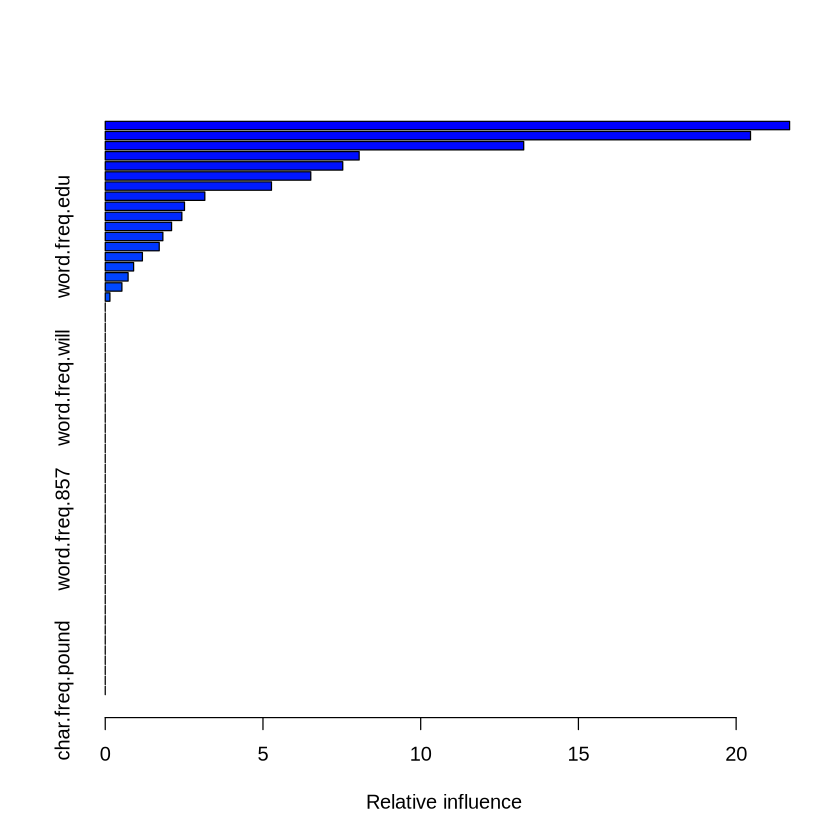

In [13]:
summary(mod)

In [14]:
class(head(spambase$is.spam))

[1] "integer"

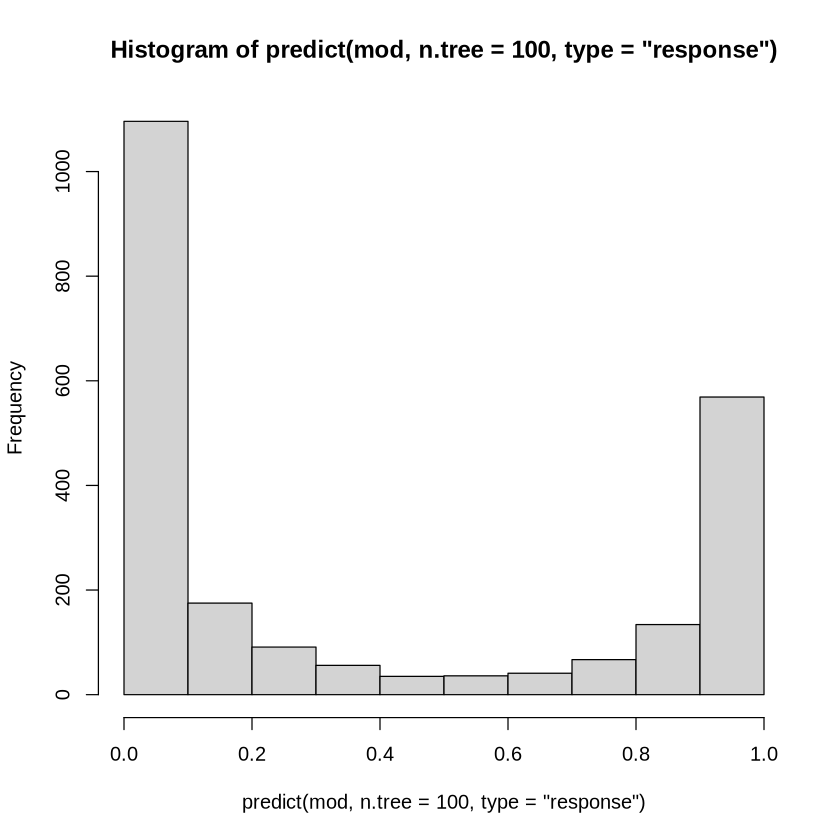

In [15]:
hist(predict(mod,n.tree=100,type="response"))

In [16]:
preds = (predict(mod,n.tree=100,type="response")>.5)*1
head(preds)

[1] 1 0 1 0 0 1

In [17]:
table(preds,train$is.spam)

     
preds    0    1
    0 1361   92
    1   38  809

In [18]:
nseq = 1:100
pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
head(pred_mtx)
dim(pred_mtx)

1,2,3,4,5,6,7,8,9,10,⋯,91,92,93,94,95,96,97,98,99,100
0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1


[1] 2300  100

In [19]:
err = sapply(nseq,function(i)mean(pred_mtx[,i]!=train$is.spam))

In [20]:
head(err)

[1] 0.3917391 0.3917391 0.2169565 0.2169565 0.2152174 0.2260870

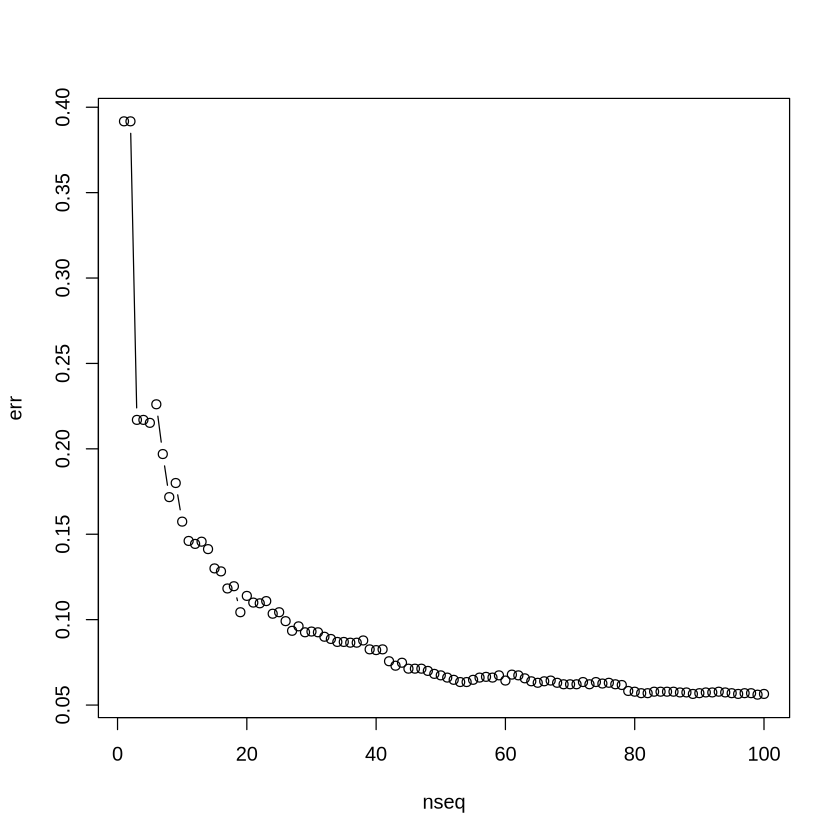

In [21]:
plot(nseq,err,type='b')

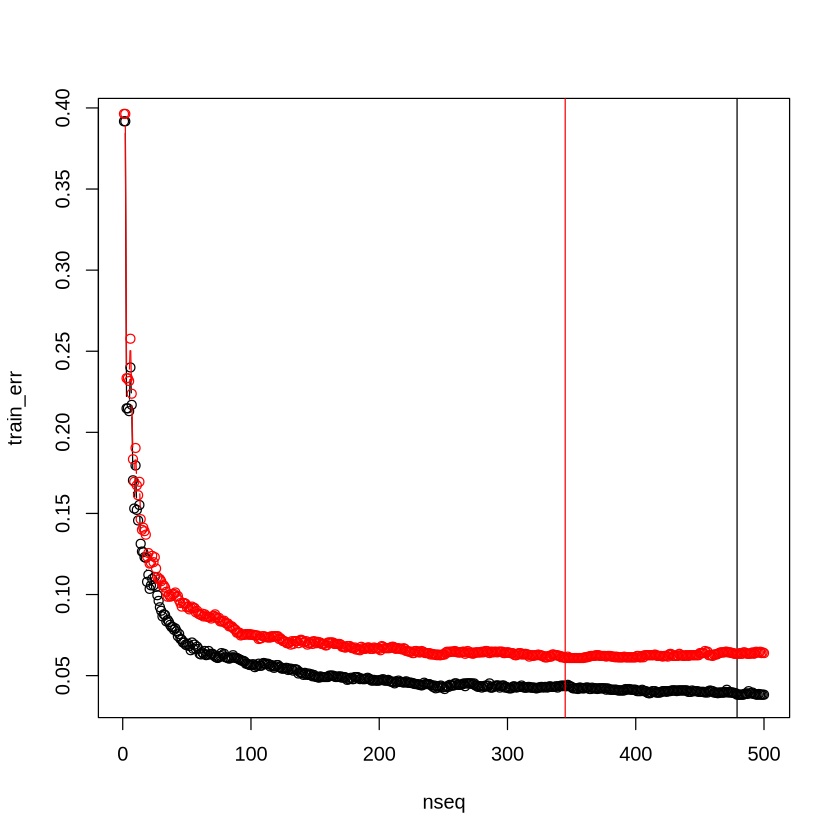

In [55]:
nseq = 1:500
mod = gbm(is.spam~.,data=train,distribution="adaboost",n.trees=max(nseq),
          shrinkage=.1,interaction.depth=1)

train_pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
train_err = sapply(nseq,function(i)mean(train_pred_mtx[,i]!=train$is.spam))
test_pred_mtx = (predict(mod,validate,n.tree=nseq,type="response")>.5)*1
test_err = sapply(nseq,function(i)mean(test_pred_mtx[,i]!=validate$is.spam))
plot(nseq,train_err,type='b')           
abline(v=which.min(train_err))
points(nseq,test_err,type='b',col='red')
abline(v=which.min(test_err),col='red')

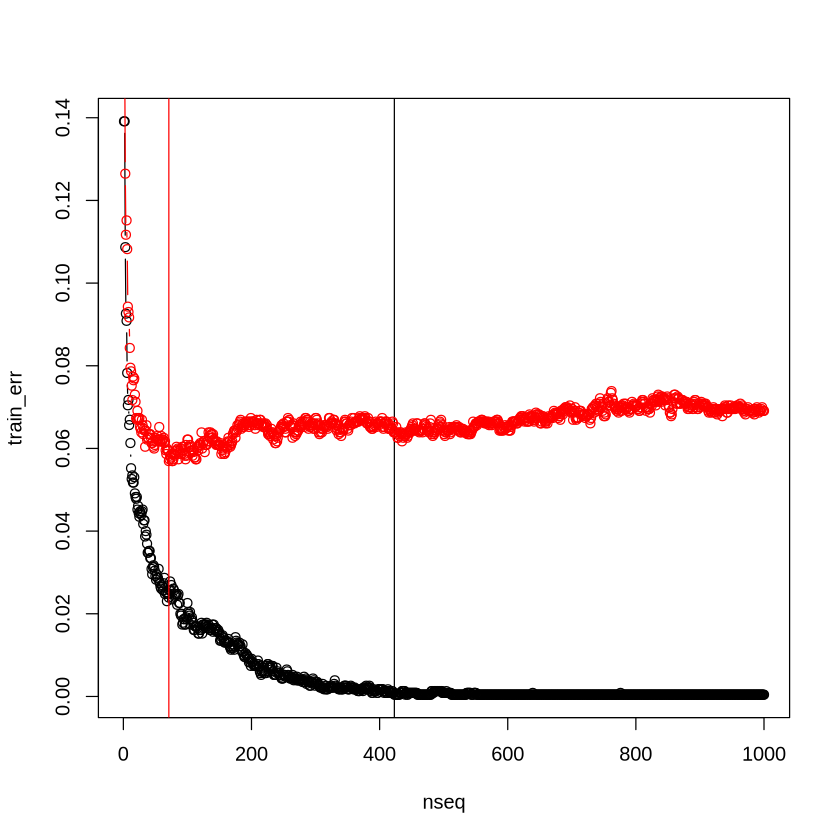

In [53]:
nseq = 1:1000
mod = gbm(is.spam~.,data=train,distribution="bernoulli",n.trees=max(nseq),
          shrinkage=.5,interaction.depth=2)

train_pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
train_err = sapply(nseq,function(i)mean(train_pred_mtx[,i]!=train$is.spam))
test_pred_mtx = (predict(mod,validate,n.tree=nseq,type="response")>.5)*1
test_err = sapply(nseq,function(i)mean(test_pred_mtx[,i]!=validate$is.spam))
plot(nseq,train_err,type='b')           
abline(v=which.min(train_err))
points(nseq,test_err,type='b',col='red')
abline(v=which.min(test_err),col='red')

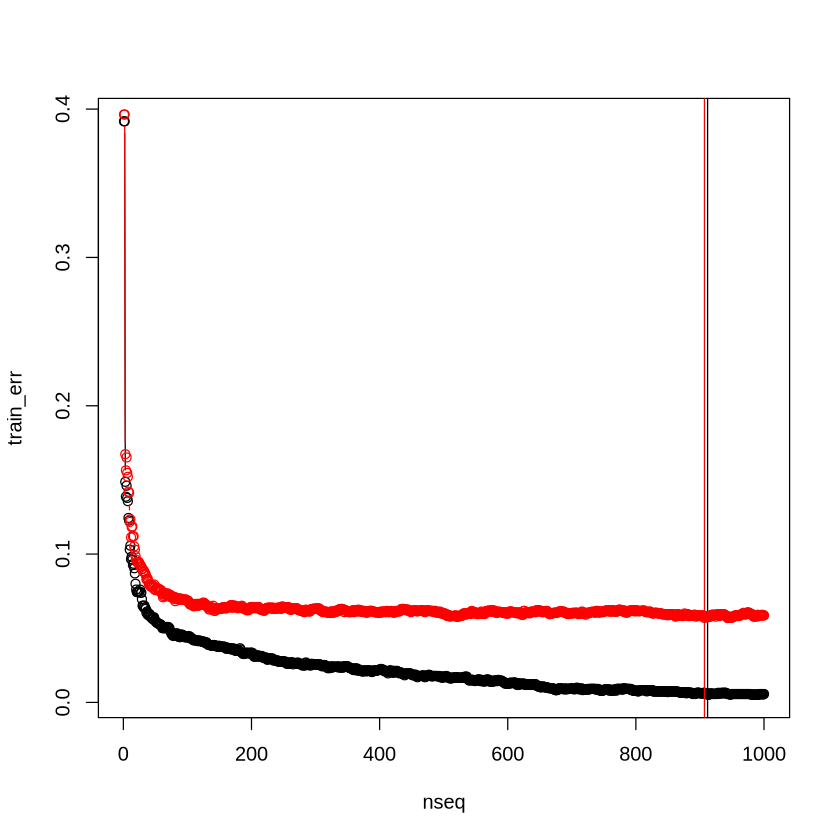

In [52]:
nseq = 1:1000
mod = gbm(is.spam~.,data=train,distribution="bernoulli",n.trees=max(nseq),
          shrinkage=.1,interaction.depth=2)

train_pred_mtx = (predict(mod,n.tree=nseq,type="response")>.5)*1
train_err = sapply(nseq,function(i)mean(train_pred_mtx[,i]!=train$is.spam))
test_pred_mtx = (predict(mod,validate,n.tree=nseq,type="response")>.5)*1
test_err = sapply(nseq,function(i)mean(test_pred_mtx[,i]!=validate$is.spam))
plot(nseq,train_err,type='b')           
abline(v=which.min(train_err))
points(nseq,test_err,type='b',col='red')
abline(v=which.min(test_err),col='red')